# Basic Statistics Case Study

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Business Problem 1

In [2]:
loans = pd.read_csv("LoansData.csv")

In [11]:
loans

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000.0,20000.00,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.00,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.00,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.00,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.00,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,30000.0,29950.00,16.77%,60 months,debt_consolidation,19.23%,NY,MORTGAGE,9250.00,705-709,15.0,45880.0,1.0,8 years
2496,16000.0,16000.00,14.09%,60 months,home_improvement,21.54%,MD,OWN,8903.25,740-744,18.0,18898.0,1.0,10+ years
2497,10000.0,10000.00,13.99%,36 months,debt_consolidation,4.89%,PA,MORTGAGE,2166.67,680-684,4.0,4544.0,0.0,10+ years
2498,6000.0,6000.00,12.42%,36 months,major_purchase,16.66%,NJ,RENT,3500.00,675-679,8.0,7753.0,0.0,5 years


In [3]:
loans_new = loans[['Amount.Funded.By.Investors','Interest.Rate','Loan.Length','Loan.Purpose','Home.Ownership','FICO.Range']]
# Changing the column names
loans_new.columns = ['Amount_Funded','Interest_Rate','Loan_Length','Loan_Purpose','Home_Ownership','FICO_Range']
loans_new

,Amount_Funded,Interest_Rate,Loan_Length,Loan_Purpose,Home_Ownership,FICO_Range
0,20000.00,8.90%,36 months,debt_consolidation,MORTGAGE,735-739
1,19200.00,12.12%,36 months,debt_consolidation,MORTGAGE,715-719
2,35000.00,21.98%,60 months,debt_consolidation,MORTGAGE,690-694
3,9975.00,9.99%,36 months,debt_consolidation,MORTGAGE,695-699
4,12000.00,11.71%,36 months,credit_card,RENT,695-699
...,...,...,...,...,...,...
2495,29950.00,16.77%,60 months,debt_consolidation,MORTGAGE,705-709
2496,16000.00,14.09%,60 months,home_improvement,OWN,740-744
2497,10000.00,13.99%,36 months,debt_consolidation,MORTGAGE,680-684
2498,6000.00,12.42%,36 months,major_purchase,RENT,675-679


In [4]:
loans_new.dtypes

Amount_Funded     float64
Interest_Rate      object
Loan_Length        object
Loan_Purpose       object
Home_Ownership     object
FICO_Range         object
dtype: object

In [5]:
# Removing the '%'' sign
loans_new['Interest_Rate'] = loans_new.Interest_Rate.str[:-1]
# Changing the data type
loans_new[['Interest_Rate']] = loans_new[['Interest_Rate']].astype('float64')
loans_new.dtypes

Amount_Funded     float64
Interest_Rate     float64
Loan_Length        object
Loan_Purpose       object
Home_Ownership     object
FICO_Range         object
dtype: object

In [6]:
loans_new.isna().sum()

Amount_Funded     1
Interest_Rate     2
Loan_Length       0
Loan_Purpose      0
Home_Ownership    1
FICO_Range        2
dtype: int64

In [7]:
loans_new.dropna(inplace=True)
loans_new.isna().sum()

Amount_Funded     0
Interest_Rate     0
Loan_Length       0
Loan_Purpose      0
Home_Ownership    0
FICO_Range        0
dtype: int64

### Using lending club loans data, the team would like to test below hypothesis on how different factors effecing each other (Hint: You may leverage hypothesis testing using statistical tests)

### a. Interest rate is varied for different loan amounts (Less interest charged for high loan amounts)

> H0: Interest rate is not varied for different loan amounts <br>
  H1: Interest rate is  varied for different loan amounts

In [8]:
stats.pearsonr(loans_new.Interest_Rate,loans_new.Amount_Funded)

PearsonRResult(statistic=0.3371393701762254, pvalue=2.413773962974798e-67)

Here p value is lesser than 0.05. So we  reject null hypothesis with 95% confidence level

#####  Interest rate is  varied for different loan amounts (Less interest charged for high loan amounts)

### b. Loan length is directly effecting interest rate.


> H0: Loan length is not directly effecting interest rate <br>
  H1: Loan length is  directly effecting interest rate

In [9]:
loans_new

,Amount_Funded,Interest_Rate,Loan_Length,Loan_Purpose,Home_Ownership,FICO_Range
0,20000.00,8.90,36 months,debt_consolidation,MORTGAGE,735-739
1,19200.00,12.12,36 months,debt_consolidation,MORTGAGE,715-719
2,35000.00,21.98,60 months,debt_consolidation,MORTGAGE,690-694
3,9975.00,9.99,36 months,debt_consolidation,MORTGAGE,695-699
4,12000.00,11.71,36 months,credit_card,RENT,695-699
...,...,...,...,...,...,...
2495,29950.00,16.77,60 months,debt_consolidation,MORTGAGE,705-709
2496,16000.00,14.09,60 months,home_improvement,OWN,740-744
2497,10000.00,13.99,36 months,debt_consolidation,MORTGAGE,680-684
2498,6000.00,12.42,36 months,major_purchase,RENT,675-679


In [10]:
# Calculating the variances of two groups
np.var(loans_new.Interest_Rate.loc[loans_new.Loan_Length == '36 months']),np.var(loans_new.Interest_Rate.loc[loans_new.Loan_Length == '60 months'])

(13.55978785692633, 17.00280360268264)

If the ratio of the larger data groups to the small data group is greater than 4:1 then we can consider that the given data groups have unequal variance.

In [11]:
stats.ttest_ind(loans_new.Interest_Rate.loc[loans_new.Loan_Length == '36 months'],
               loans_new.Interest_Rate.loc[loans_new.Loan_Length == '60 months']) 

Ttest_indResult(statistic=-23.39876357348193, pvalue=1.2648546928005904e-109)

Here p value is lesser than 0.05. So we  reject null hypothesis with 95% confidence level

##### Loan length is directly affecting interest rate

### c. Interest rate varies for different purpose of loans

> H0: Interest rate is not varied for different purpose of loans <br>
  H1: Interest rate is  varied for different purpose of loans

In [12]:
loans_new.Loan_Purpose.value_counts()

Loan_Purpose
debt_consolidation    1303
credit_card            443
other                  201
home_improvement       152
major_purchase         101
small_business          87
car                     50
wedding                 38
medical                 30
moving                  29
vacation                21
house                   20
educational             15
renewable_energy         4
Name: count, dtype: int64

In [13]:
x = list(loans_new.Loan_Purpose.unique())

In [14]:
x

['debt_consolidation',
 'credit_card',
 'other',
 'moving',
 'car',
 'vacation',
 'home_improvement',
 'house',
 'major_purchase',
 'educational',
 'medical',
 'wedding',
 'small_business',
 'renewable_energy']

In [15]:
stats.f_oneway(*(loans_new.Interest_Rate.loc[loans_new['Loan_Purpose']==loan_purpose] 
 for loan_purpose in loans_new['Loan_Purpose'].unique()))

F_onewayResult(statistic=7.478282787988784, pvalue=1.1904672506941616e-14)

Here p value is lesser than 0.05. So we  reject null hypothesis with 95% confidence level

#### Interest rate is varied for different purpose of loans

### d. There is relationship between FICO scores and Home Ownership. It means that, People with owning home will have high FICO scores.

> H0 : There is no relationship between FICO scores and Home Owneship <br>
H1: There is  relationship between FICO scores and Home Owneship

In [16]:
loans_new.Home_Ownership.value_counts()

Home_Ownership
MORTGAGE    1145
RENT        1143
OWN          200
OTHER          5
NONE           1
Name: count, dtype: int64

In [17]:
loans_new.FICO_Range.value_counts()

FICO_Range
670-674    171
675-679    166
680-684    157
695-699    153
665-669    145
690-694    139
685-689    136
705-709    134
700-704    131
660-664    124
720-724    114
710-714    110
730-734     94
725-729     94
715-719     93
735-739     65
750-754     61
745-749     54
740-744     53
755-759     46
760-764     46
765-769     36
780-784     28
775-779     22
790-794     20
785-789     19
770-774     17
800-804     13
795-799     13
805-809     11
810-814      8
815-819      6
640-644      5
655-659      4
645-649      3
830-834      1
820-824      1
650-654      1
Name: count, dtype: int64

In [18]:
y = pd.crosstab(loans_new.FICO_Range,loans_new.Home_Ownership,margins=True)

In [19]:
y

Home_Ownership,MORTGAGE,NONE,OTHER,OWN,RENT,All
FICO_Range,,,,,,
640-644,0,0,0,1,4,5
645-649,1,0,0,0,2,3
650-654,1,0,0,0,0,1
655-659,0,0,1,0,3,4
660-664,41,0,0,17,66,124
665-669,52,0,0,18,75,145
670-674,67,0,1,13,90,171
675-679,79,0,1,11,75,166
680-684,55,0,2,9,91,157


In [20]:
stats.chi2_contingency(observed=y)

(472.87112497585156,
 4.2471616255039004e-26,
 190,
 array([[2.29550922e+00, 2.00481155e-03, 1.00240577e-02, 4.00962310e-01,
         2.29149960e+00, 5.00000000e+00],
        [1.37730553e+00, 1.20288693e-03, 6.01443464e-03, 2.40577386e-01,
         1.37489976e+00, 3.00000000e+00],
        [4.59101844e-01, 4.00962310e-04, 2.00481155e-03, 8.01924619e-02,
         4.58299920e-01, 1.00000000e+00],
        [1.83640738e+00, 1.60384924e-03, 8.01924619e-03, 3.20769848e-01,
         1.83319968e+00, 4.00000000e+00],
        [5.69286287e+01, 4.97193264e-02, 2.48596632e-01, 9.94386528e+00,
         5.68291901e+01, 1.24000000e+02],
        [6.65697674e+01, 5.81395349e-02, 2.90697674e-01, 1.16279070e+01,
         6.64534884e+01, 1.45000000e+02],
        [7.85064154e+01, 6.85645549e-02, 3.42822775e-01, 1.37129110e+01,
         7.83692863e+01, 1.71000000e+02],
        [7.62109062e+01, 6.65597434e-02, 3.32798717e-01, 1.33119487e+01,
         7.60777867e+01, 1.66000000e+02],
        [7.20789896e+01, 6.2

Here p value is lesser than 0.05. So we  reject null hypothesis with 95% confidence level

##### There is  relationship between FICO scores and Home Owneship

## BUSINESS PROBLEM - 2


### We would like to assess if there is any difference in the average price quotes provided by Mary and Barry.

In [21]:
price_quote= pd.read_csv("Price_Quotes.csv")

In [22]:
price_quote

,Order_Number,Barry_Price,Mary_Price
0,1,126,114
1,2,110,118
2,3,138,114
3,4,142,111
4,5,146,129
5,6,136,119
6,7,94,97
7,8,103,104
8,9,140,127
9,10,152,133


In [23]:
price_quote.dtypes

Order_Number    int64
Barry_Price     int64
Mary_Price      int64
dtype: object

In [24]:
price_quote.Barry_Price.mean()

124.33333333333333

In [25]:
price_quote.Mary_Price.mean()

114.75

> H0: Average price quotes provide by Mary and Barry are equal <br>
H1: Average price quotes provide by Mary and Barry are not equal

In [26]:
stats.ttest_rel(a= price_quote.Barry_Price,
                b= price_quote.Mary_Price)

Ttest_relResult(statistic=2.5213765108923494, pvalue=0.02840588045242053)

Here p value is lesser than 0.05. So we  reject null hypothesis with 95% confidence level

##### There is  difference in the average price quotes provided by Mary and Barry

## BUSINESS PROBLEM - 3

###  Determine what effect, if any, the reengineering effort had on the incidence behavioral problems and staff turnover. i.e To determine if the reengineering effort changed the critical incidence rate. Isthere evidence that the critical incidence rate improved?


In [27]:
treatment =  pd.read_csv("Treatment_Facility.csv")

In [28]:
treatment.rename(columns={'VAR4' : 'TRFF(%)', 'VAR5' : 'CI(%)'},inplace=True)

In [29]:
treatment

,Month,Reengineer,Employee_Turnover,TRFF(%),CI(%)
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830
3,4,Prior,3.3333,18.404908,110.429448
4,5,Prior,12.9032,17.964072,23.952096
5,6,Prior,9.6774,41.176471,47.058824
6,7,Prior,11.7647,13.422819,0.000000
7,8,Prior,11.4286,31.250000,25.000000
8,9,Prior,23.0769,17.241379,132.183908
9,10,Prior,15.0000,16.574586,16.574586


In [30]:
prior = treatment.loc[treatment.Reengineer == 'Prior']

In [31]:
post = treatment.loc[treatment.Reengineer == 'Post']

In [32]:
prior.Employee_Turnover.mean()

11.735692307692307

In [33]:
post.Employee_Turnover.mean()

18.68912857142857

### Effects of reengineering effort on staff turnover

> H0: Staff turnover before reengineering effort = Staff turnover after reengineering effort <br>
    H1: Staff turnover before reengineering effort >Staff turnover after reengineering effort 

In [35]:
# Variance of two groups
np.var(prior.Employee_Turnover),np.var(post.Employee_Turnover)

(45.77063233301775, 95.5017958420408)

If the ratio of the larger data groups to the small data group is greater than 4:1 then we can consider that the given data groups have unequal variance.

In [36]:
stats.ttest_ind(prior.Employee_Turnover,post.Employee_Turnover)

Ttest_indResult(statistic=-1.770306704753604, pvalue=0.09361109345535304)

Here p value is greater than 0.05. So we  failed to reject null hypothesis with 95% confidence level

##### Staff turnover before and after reengineering efforts are equal. Reengineering effort didn't affect staff turnover

### Effects of reengineering effort on critical incident rate

> H0: Critical incident rate before reengineering effort = critical incident rate after reengineering effort <br>
    H1: Critical incident rate before reengineering effort != Critical incident rate after reengineering effort 

In [37]:
prior['CI(%)'].mean()

53.887906321846145

In [38]:
post['CI(%)'].mean()

23.34971927988571

In [39]:
np.var(prior['CI(%)']),np.var(post['CI(%)'])

(2188.851951255721, 52.258022415666076)

If the ratio of the larger data groups to the small data group is greater than 4:1 then we can consider that the given data groups have unequal variance.

In [40]:
stats.ttest_ind(prior['CI(%)'],post['CI(%)'],equal_var=False)

Ttest_indResult(statistic=2.209006531430452, pvalue=0.045565519570193204)

Here p value is lesser than 0.05. So we  reject null hypothesis with 95% confidence level

##### There is change in critical incident rate before and after rengineering effort. Critical incident rate improved after reengineering effort

## BUSINESS PROBLEM - 4

### We will focus on the prioritization system. If the system is working, then high priority jobs, on average, should be completed more quickly than medium priority jobs, and medium priority jobs should be completed more quickly than low priority jobs. Use the data provided to determine whether thisis, in fact, occurring.


In [41]:
priority = pd.read_csv("Priority_Assessment.csv")

In [42]:
priority

,Days,Priority
0,3.3,High
1,7.9,Medium
2,0.3,High
3,0.7,Medium
4,8.6,Medium
...,...,...
637,2.5,Low
638,0.3,High
639,0.3,Medium
640,1.3,Medium


In [43]:
priority.Days.loc[priority.Priority == 'High'].mean()

3.0236196319018402

In [44]:
priority.Days.loc[priority.Priority == 'Medium'].mean()

2.5

In [45]:
priority.Days.loc[priority.Priority == 'Low'].mean()

4.228358208955224

In [46]:
priority.Priority.value_counts()

Priority
High      326
Medium    249
Low        67
Name: count, dtype: int64

#### High and Medium priority

> H0: High priority jobs and medium priority jobs completed same time <br>
H1: High priority jobs completed quickly than medium priority jobs 

In [47]:
np.var(priority.Days.loc[priority.Priority == 'High']),np.var(priority.Days.loc[priority.Priority == 'Medium'])

(60.363951315442876, 25.01590361445786)

If the ratio of the larger data groups to the small data group is greater than 4:1 then we can consider that the given data groups have unequal variance.

In [48]:
stats.ttest_ind(priority.Days.loc[priority.Priority == 'High'],
                priority.Days.loc[priority.Priority == 'Medium'])

Ttest_indResult(statistic=0.925239411198133, pvalue=0.3552308818116795)

Here p value is greater than 0.05. So we  failed to reject null hypothesis with 95% confidence level

##### High priority jobs and medium priority jobs completed same time

#### Medium and Low priority

> H0: Medium priority jobs and low priority jobs completed same time <br>
H1: Medium priority jobs completed quickly than low priority jobs 

In [49]:
np.var(priority.Days.loc[priority.Priority == 'Medium']),np.var(priority.Days.loc[priority.Priority == 'Low'])

(25.01590361445786, 38.719345065716176)

If the ratio of the larger data groups to the small data group is greater than 4:1 then we can consider that the given data groups have unequal variance.

In [50]:
stats.ttest_ind(priority.Days.loc[priority.Priority == 'Medium'],
                priority.Days.loc[priority.Priority == 'Low'])

Ttest_indResult(statistic=-2.3690822147998514, pvalue=0.01843700901540487)

Here p value is lesser than 0.05. So we  reject null hypothesis with 95% confidence level

#####  Medium priority jobs completed quickly than low priority jobs

##### High priority jobs are not completed before medium priority jobs  and Medium priority jobs are completed quickly than low priority jobs. So prioritization system is not totally working

## BUSINESS PROBLEM - 5

In [51]:
films = pd.read_csv("Films.csv")

In [52]:
films.drop(columns='_rowstate_',inplace=True)

In [53]:
films

,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...
325,Old School,2,2,1.0,2.0,1.0,1.0,2.0,1.0,1
326,Old School,1,1,2.0,2.0,2.0,2.0,3.0,3.0,5
327,Old School,2,1,2.0,1.0,1.0,2.0,2.0,2.0,5
328,Old School,1,1,1.0,1.0,1.0,1.0,2.0,1.0,3


In [54]:
films.Gender.value_counts()

Gender
2         194
1         104
Female     19
Male       13
Name: count, dtype: int64

In [55]:
# Converting categorical data to numeric values
films.Gender.replace(['Female','Male'],[2,1],inplace=True)

In [56]:
# Changing the data types
films['Gender'] = films.Gender.astype('int64')

In [57]:
films.Gender.value_counts()

Gender
2    213
1    117
Name: count, dtype: int64

In [58]:
films.isna().sum()

Movie              0
Gender             0
Marital_Status     2
Sinage             2
Parking            2
Clean              3
Overall            2
Age                2
Income            16
Hear_About         7
dtype: int64

In [59]:
films.dropna(inplace=True)

In [60]:
films.Marital_Status.value_counts()

Marital_Status
2          192
1           80
Single      16
Married     11
Slngle       2
Name: count, dtype: int64

In [61]:
# Changing the categorical and misspelt values to numerical values
films.Marital_Status.replace(['Married','Single','Slngle'],[1,2,2],inplace=True)

In [62]:
films['Marital_Status'] = films.Marital_Status.astype('int64')

In [63]:
films.Marital_Status.value_counts()

Marital_Status
2    210
1     91
Name: count, dtype: int64

###  What is the overall level of customer satisfaction?

In [64]:
films.Overall.value_counts()

Overall
2.0    148
1.0    137
3.0     12
5.0      3
4.0      1
Name: count, dtype: int64

In [65]:
(films.Overall.value_counts(normalize=True))*100

Overall
2.0    49.169435
1.0    45.514950
3.0     3.986711
5.0     0.996678
4.0     0.332226
Name: proportion, dtype: float64

##### About 49 and 45 percent customers gave overall satisfaction 2 and 1 respectively. So most customers gave overall satisfaction 2 and 1

### What factors are linked to satisfaction?

In [66]:
films

,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,Ferris Buellers Day Off,2,1,2.0,2.0,2.0,2.0,3.0,1.0,5
1,Ferris Buellers Day Off,2,2,1.0,1.0,1.0,1.0,2.0,1.0,5
2,Ferris Buellers Day Off,1,1,2.0,4.0,3.0,2.0,4.0,1.0,5
3,Ferris Buellers Day Off,2,1,1.0,3.0,2.0,2.0,4.0,1.0,5
4,Ferris Buellers Day Off,2,1,1.0,1.0,1.0,1.0,3.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...
325,Old School,2,2,1.0,2.0,1.0,1.0,2.0,1.0,1
326,Old School,1,1,2.0,2.0,2.0,2.0,3.0,3.0,5
327,Old School,2,1,2.0,1.0,1.0,2.0,2.0,2.0,5
328,Old School,1,1,1.0,1.0,1.0,1.0,2.0,1.0,3


#### Signage

> H0: Signage is not affecting the Overall satisfaction <br>
H1: Signage is affecting the Overall satisfaction

In [85]:
stats.chi2_contingency(pd.crosstab(films.Sinage,films.Overall,margins=True))

(121.32462033201085,
 1.2922844322850256e-14,
 25,
 array([[4.77906977e+01, 5.16279070e+01, 4.18604651e+00, 3.48837209e-01,
         1.04651163e+00, 1.05000000e+02],
        [6.37209302e+01, 6.88372093e+01, 5.58139535e+00, 4.65116279e-01,
         1.39534884e+00, 1.40000000e+02],
        [2.04817276e+01, 2.21262458e+01, 1.79401993e+00, 1.49501661e-01,
         4.48504983e-01, 4.50000000e+01],
        [2.73089701e+00, 2.95016611e+00, 2.39202658e-01, 1.99335548e-02,
         5.98006645e-02, 6.00000000e+00],
        [2.27574751e+00, 2.45847176e+00, 1.99335548e-01, 1.66112957e-02,
         4.98338870e-02, 5.00000000e+00],
        [1.37000000e+02, 1.48000000e+02, 1.20000000e+01, 1.00000000e+00,
         3.00000000e+00, 3.01000000e+02]]))

Here p value is lesser than 0.05. So we  reject null hypothesis with 95% confidence level

##### Signage is affecting Overall satisfaction. Signage is one of the factors linked to Overall satisfaction

#### Parking

> H0: Parking is not affecting the Overall satisfaction <br>
H1: Parking is affecting the Overall satisfaction

In [67]:
stats.chi2_contingency(pd.crosstab(films.Parking,films.Overall,margins=True))

(218.79348282085002,
 7.07379320798715e-33,
 25,
 array([[5.55282392e+01, 5.99867110e+01, 4.86378738e+00, 4.05315615e-01,
         1.21594684e+00, 1.22000000e+02],
        [6.32657807e+01, 6.83455150e+01, 5.54152824e+00, 4.61794020e-01,
         1.38538206e+00, 1.39000000e+02],
        [1.31993355e+01, 1.42591362e+01, 1.15614618e+00, 9.63455150e-02,
         2.89036545e-01, 2.90000000e+01],
        [3.18604651e+00, 3.44186047e+00, 2.79069767e-01, 2.32558140e-02,
         6.97674419e-02, 7.00000000e+00],
        [1.82059801e+00, 1.96677741e+00, 1.59468439e-01, 1.32890365e-02,
         3.98671096e-02, 4.00000000e+00],
        [1.37000000e+02, 1.48000000e+02, 1.20000000e+01, 1.00000000e+00,
         3.00000000e+00, 3.01000000e+02]]))

Here p value is lesser than 0.05. So we  reject null hypothesis with 95% confidence level

##### Parking is affecting Overall satisfaction. Parking is one of the factors linked to Overall satisfaction

#### Cleanliness

> H0: Cleanliness is not affecting the Overall satisfaction <br>
H1: Cleanliness is affecting the Overall satisfaction

In [68]:
stats.chi2_contingency(pd.crosstab(films.Clean,films.Overall,margins=True))

(129.0342392337068,
 5.484923462041103e-16,
 25,
 array([[6.09900332e+01, 6.58870432e+01, 5.34219269e+00, 4.45182724e-01,
         1.33554817e+00, 1.34000000e+02],
        [6.28106312e+01, 6.78538206e+01, 5.50166113e+00, 4.58471761e-01,
         1.37541528e+00, 1.38000000e+02],
        [1.00132890e+01, 1.08172757e+01, 8.77076412e-01, 7.30897010e-02,
         2.19269103e-01, 2.20000000e+01],
        [2.27574751e+00, 2.45847176e+00, 1.99335548e-01, 1.66112957e-02,
         4.98338870e-02, 5.00000000e+00],
        [9.10299003e-01, 9.83388704e-01, 7.97342193e-02, 6.64451827e-03,
         1.99335548e-02, 2.00000000e+00],
        [1.37000000e+02, 1.48000000e+02, 1.20000000e+01, 1.00000000e+00,
         3.00000000e+00, 3.01000000e+02]]))

Here p value is lesser than 0.05. So we  reject null hypothesis with 95% confidence level

##### Clean is affecting the overall satisfaction. Cleanliness is one of the factors linked to Overall satisfaction

In [69]:
stats.chi2_contingency(pd.crosstab(films.Movie,films.Overall,margins=True)) # Films which showing didn't affect Overall satisfaction

(13.765798136752121,
 0.5433606325907478,
 15,
 array([[5.82591362e+01, 6.29368771e+01, 5.10299003e+00, 4.25249169e-01,
         1.27574751e+00, 1.28000000e+02],
        [1.41096346e+01, 1.52425249e+01, 1.23588040e+00, 1.02990033e-01,
         3.08970100e-01, 3.10000000e+01],
        [6.46312292e+01, 6.98205980e+01, 5.66112957e+00, 4.71760797e-01,
         1.41528239e+00, 1.42000000e+02],
        [1.37000000e+02, 1.48000000e+02, 1.20000000e+01, 1.00000000e+00,
         3.00000000e+00, 3.01000000e+02]]))

##### Signage,Parking and Clean Are the only three factors linked to overall satisfaction

### What is the demographic profile of Film on the Rocks patrons?

In [70]:
films.Gender.value_counts() # More females are attending than men

Gender
2    195
1    106
Name: count, dtype: int64

In [71]:
films.Gender.value_counts(normalize=True) * 100

Gender
2    64.784053
1    35.215947
Name: proportion, dtype: float64

##### 64 percent of customers are Females

In [72]:
films.Marital_Status.value_counts() # Singles are attending more than married peoples

Marital_Status
2    210
1     91
Name: count, dtype: int64

In [73]:
films.Marital_Status.value_counts(normalize=True) * 100

Marital_Status
2    69.767442
1    30.232558
Name: proportion, dtype: float64

##### About 69 percent of customers are Singles

In [74]:
films.Age.value_counts() # Age grooup 13-30 attending more than any other age group

Age
2.0    164
3.0    108
1.0     22
4.0      7
Name: count, dtype: int64

In [75]:
films.Age.value_counts(normalize=True) * 100

Age
2.0    54.485050
3.0    35.880399
1.0     7.308970
4.0     2.325581
Name: proportion, dtype: float64

##### 54 percent of customers are in the age group of 13-30

In [76]:
films.Income.value_counts() # Peoples who have income Less than $50,000 are attending more

Income
1.0    135
3.0     86
2.0     80
Name: count, dtype: int64

In [77]:
films.Income.value_counts(normalize=True) * 100

Income
1.0    44.850498
3.0    28.571429
2.0    26.578073
Name: proportion, dtype: float64

##### 44 percent of customers are in the income range of less than $50,000

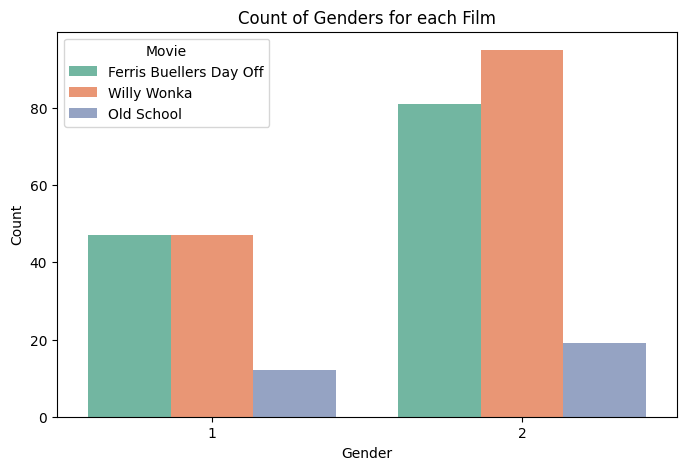

In [78]:

sns.set_palette("Set2")

plt.figure(figsize=(8, 5))  # Adjust the figsize as per your preference
sns.countplot(data=films, x='Gender', hue='Movie')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Genders for each Film')
plt.legend(title='Movie')
plt.show()


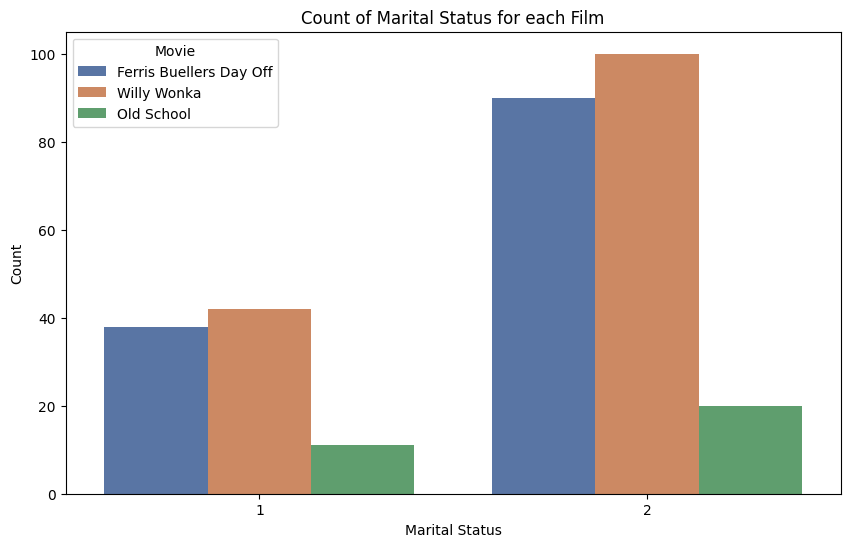

In [79]:

sns.set_palette("deep")

plt.figure(figsize=(10, 6))
sns.countplot(data=films, x='Marital_Status', hue='Movie')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Count of Marital Status for each Film')
plt.legend(title='Movie')
plt.show()


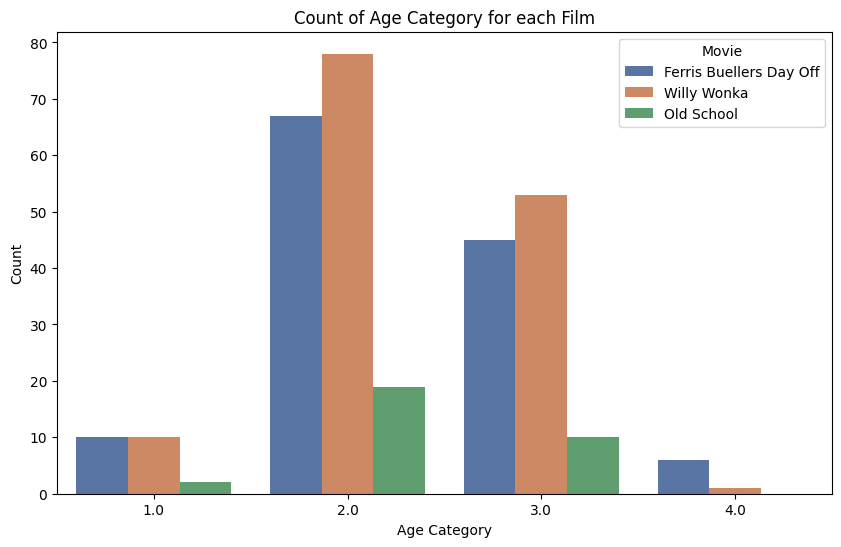

In [80]:
sns.set_palette("deep")

plt.figure(figsize=(10, 6))
sns.countplot(data=films, x='Age', hue='Movie')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.title('Count of Age Category for each Film')
plt.legend(title='Movie')
plt.show()

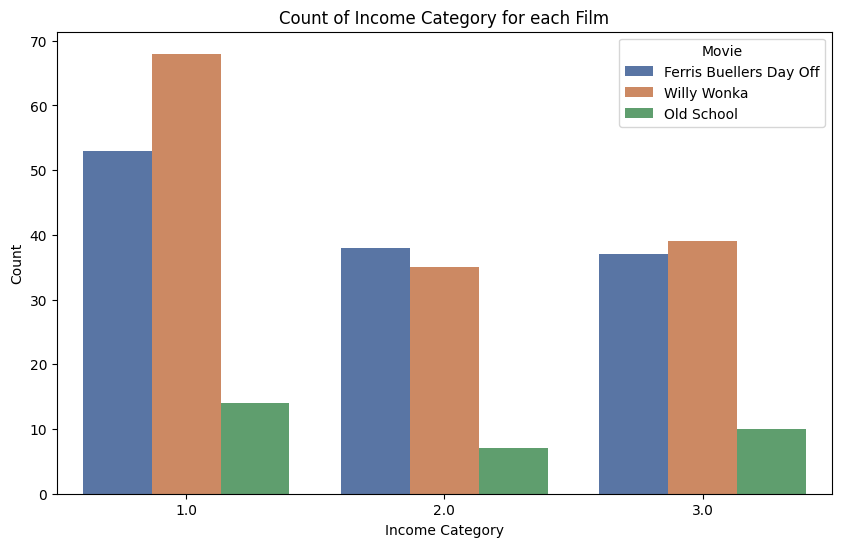

In [81]:

sns.set_palette("deep")

plt.figure(figsize=(10, 6))
sns.countplot(data=films, x='Income', hue='Movie')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.title('Count of Income Category for each Film')
plt.legend(title='Movie')
plt.show()

### In what media outlet(s) should the film series be advertised?

In [82]:
a = films.loc[films.Hear_About.isin(['1','2','3','4','5'])].Hear_About.value_counts()

In [83]:
a

Hear_About
5    212
4     39
1     19
3     13
2     11
Name: count, dtype: int64

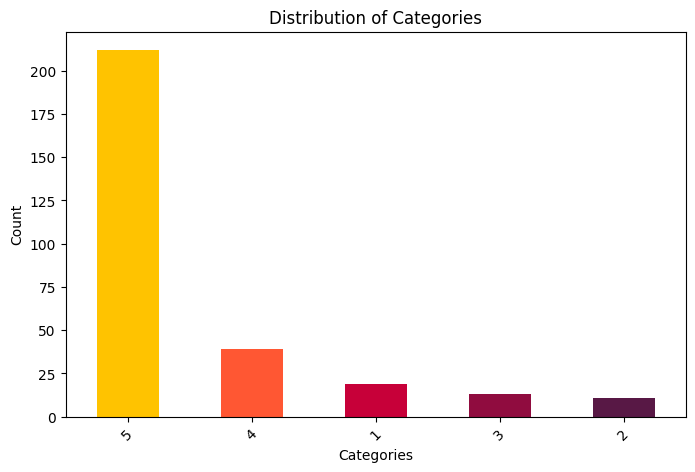

In [85]:

colors = ['#FFC300', '#FF5733', '#C70039', '#900C3F', '#581845']

plt.figure(figsize=(8, 5))
a.plot(kind='bar', color=colors)
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Distribution of Categories')
plt.xticks(rotation=45)
plt.show()


#### 72 percent of participants in the data attended the film fest  from word of mouth ie through mouth publicity . Then more than 13 percent of viewers know about the film fest through websites.


##### Website advertisement should be focused more than any other advertisements in media outlets. Most of the people are spending much time in internet. Website advertisement should mainly consist of social media ad.